# Homework 4

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [54]:
deposit_percent = 0.05

salary_increase = 0.08

inflation = 0.03
age_start = 40 # my age
pension_start = 60
finish_year = 100
salary_m = 2000
infl_r = 1 + inflation
salary_r = 1 + salary_increase
deposit_r = deposit_percent + 1
monthes = 12
years_salary = pension_start - age_start


def canSpendPerYear(balance):
    percent = deposit_percent + 1
    periods = finish_year - pension_start
    return ( balance*percent**(periods-1) )  / ( sum([percent**i * infl_r**(periods-i - 1) for i in range(periods) ]) ) / 12

def pensionFromDeposit(monthUsage):
    
    deposited = sum([
        (
            salary_m * salary_r ** (years_salary - i)
            -
            monthUsage * infl_r ** (years_salary - i)
        ) * monthes * (deposit_r ** i)
        for i in range(1,years_salary)
    ])
    
    return deposited, canSpendPerYear(deposited) / infl_r ** years_salary

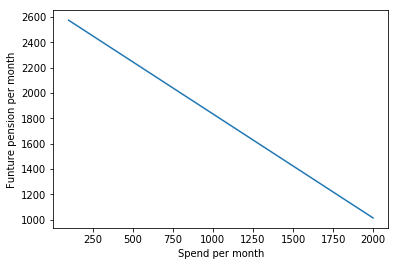

In [56]:
spends = np.arange(100,2000)
results = np.array([pensionFromDeposit(x)[1] for x in spends])

plt.xlabel('Spend per month')
plt.ylabel('Funture pension per month')
plt.plot(spends, results)

In [58]:
diffs = np.abs(spends - results)
res = spends[np.argmin(diffs)]
res

1459

I have to spend $1459 per month to have most stable month spendings.

## Task 2

In [32]:
ps = np.array([ 0.2, 0.2, 0.3, 0.2, 0.1 ])
xs = np.array([ 10000, 15000, 25000, 40000, 50000 ])

E_x =  np.sum( ps * xs )
Sigma_x = np.sqrt( np.sum( ps * (xs - E_x)**2 ) )

print(f"Expected price     = {E_x}")
print(f"Standard deviation = {Sigma_x}")

Expected price     = 25500.0
Standard deviation = 13124.404748406687


## Task 3

In [33]:
years = 3
investment = 50000
percent = 0.16

way_1 = investment * (1+percent)**years
way_2 = investment*percent*years

print(f"Неперервний            => {way_1}")
print(f"Компаудування що місяця  => {way_2}")

Неперервний            => 78044.79999999997
Компаудування що місяця  => 24000.0


## Task 4

In [34]:
years = 25
discont = 0.2
present = 1000

res = present / ( (1+discont) ** years )

print(f"За 25 років 1000 гривень будуть коштувати сьогоднішні {res} грн")

За 25 років 1000 гривень будуть коштувати сьогоднішні 10.48259601039611 грн


## Task 5

In [35]:
res = np.round((1.03 ** 12 - 1), 2)
print(f"Справжня річна ставка = {res}%, якщо складний відсоток")
print(f"Справжня річна ставка = {0.03 * 12}%, якщо простий відсоток")

Справжня річна ставка = 0.43%, якщо складний відсоток
Справжня річна ставка = 0.36%, якщо простий відсоток


## Task 6

$1500 = 500 \times 1.09 ^ x$

$1.09^x 0 3$

$x = log_{1.09}(3)$

Text(0,0.5,'Вклад')

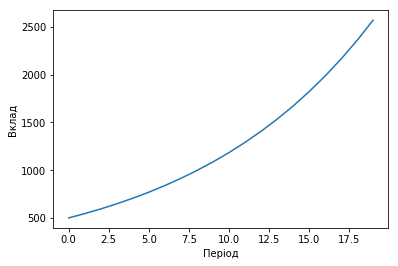

In [36]:
xs = np.arange(0,20, 1)
res = 500*1.09**xs

plt.plot(xs, res)
plt.xlabel("Період")
plt.ylabel("Вклад")

In [37]:
x = math.log(3, 1.09)
x

12.748220671797961

In [38]:
res = math.ceil(x)
print(f"Періодів оплат потрібно - {res}")

Періодів оплат потрібно - 13


## Task 7

In [45]:
import scipy.optimize as scopt

rate = 0.1/4
fvs = [ 50000, 40000, 80000 ] 
periods = [1, 3, 8]*4
pvs = [ fv/(1+rate)**period for fv, period in zip(fvs, periods) ]
pv = np.sum(pvs)


def toOptimise(ratio):
    return pv*ratio*(1+rate)**12 - pv*(1-ratio)*(1+rate)**28

result = scopt.root_scalar(toOptimise, bracket=[0, 1])

print(f"Current value of cash flow {pv}")

result

Current value of cash flow 151584.1899067154


      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 3
           root: 0.5975054386336517

In [48]:
ratio = results.root
new_fvs = [ pv*ratio*(1+rate)**12, pv*(1-ratio)*(1+rate)**28 ]
new_fvs[0]

121809.77879641112

First payment would cost 59% of current value of cash flow.

Future value of two years payment = 121809.77

## Task 8

In [51]:
deposit_rate = 0.12
month_payment = -2000

bro_1 = np.fv(deposit_rate, 6, month_payment, 0)
bro_1 = np.fv(deposit_rate, 37, 0, -bro_1)

bro_2 = np.fv(deposit_rate, 37, month_payment, 0)

print(f"1 = {bro_1}, 2 = {bro_2}")

1 = 1074967.850003538, 2 = 1087197.3800005412


Преший брат отримує менше накопичень на 10 тис. . Але ця різниця є порівняно невелика, враховуючи що він відкладав лише 6 років.

Тому перша інвестиція є більш вигіднішою.

Від себе: це дуже цікавий приклад!